In [1]:
%matplotlib inline

In [273]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os

In [43]:
from subprocess import call, Popen

In [101]:
def gen_test (cap, table_size, min_value, max_value):
    p = Popen (['./gen', str(cap), str(table_size), str(table_size), str(min_value), str(max_value)], stdout=PIPE, stderr=PIPE)
    output, err = p.communicate()
    return output

In [136]:
def compile():
    call ('g++ -std=c++11 -O2 lemke_howson.cc -o main'.split(' '))

In [177]:
def solved (output):
    return 'Solved.' == output[-1][0]

In [434]:
def soma (output):
    s = 0
    for i in range(len(output)):
        s += output[i][1]
    return s

In [267]:
def run(data):
    compile()
    p = Popen (['./main'], stdin=PIPE, stdout=PIPE, stderr=PIPE)
    mo = p.communicate(input=data)[0]
    output = mo.split('\n')[:-2]
    for i, line in enumerate(output):
        line = line.split(' ')
        line[1] = int(line[1])
        line[2] = float(line[2])
        output[i] = line
    return output

In [339]:
def read_files():
    arr = [[] for i in range(16)]
    for filename in os.listdir('output/'):
        if '.txt' not in filename:
            continue
        with open('output/' + filename) as f:
            data = f.readlines()
            data = map (lambda x: x.strip().split(' '), data)[:-1]
            for i, line in enumerate(data):
                line[1] = int(line[1])
                line[2] = float(line[2])
                data[i] = line
            index = int(filename.split('_')[1])
            print index, 'append', filename, len(arr[index])
            arr[index].append(data)
    return arr

(-10, 110)

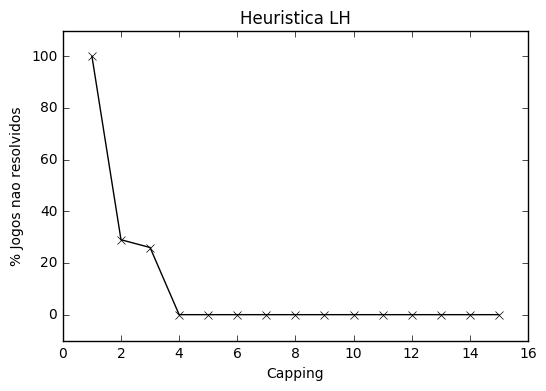

In [396]:
y = []
for i in range(1, 16):
    s = 0
    n = 0
    for i, chunk in enumerate(arr[i]):
        if solved(chunk):
            s += 1
        else:
            n += 1
    y.append( (100*n+0.0)/(n+s) )
    
x = range(1, 16)

ax = plt.plot(x, y, marker='x', color='black')
plt.xlabel('Capping')
plt.ylabel('% Jogos nao resolvidos')
plt.title('Heuristica LH')
plt.ylim(-10, 110)

In [658]:
df = pd.DataFrame()
for i in range(1, 35):
    heuristica = pd.read_csv('lh_normal/heuristica_{}.csv'.format(i), names=['num_iter', 'num_index', 'time', 'foundEquilibrium'])
    normal = pd.read_csv('lh_normal/normal_{}.csv'.format(i), names=['num_iter', 'num_index', 'time', 'foundEquilibrium'])
    
#     heuristica['num_iter'] = heuristica['num_iter'] / heuristica['num_index']
#     normal['num_iter'] = normal['num_iter'] / normal['num_index']
    
    df.set_value(i, 'heuristica', heuristica['num_iter'].mean())
    df.set_value(i, 'normal', normal['num_iter'].mean())

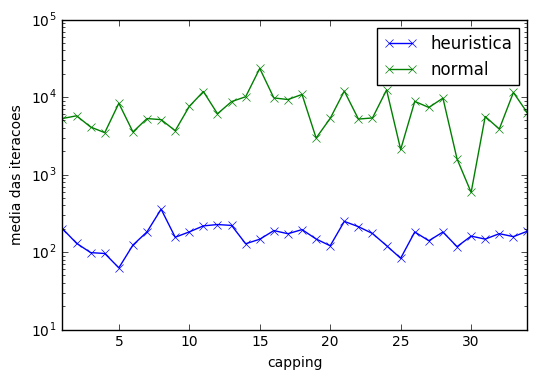

In [659]:
ax = df.plot(marker='x', logy=True,)
ax.set_ylabel('media das iteracoes')
ax.set_xlabel('capping')

In [655]:
df = pd.DataFrame()
for i in range(10, 101, 10):
    heuristica = pd.read_csv('table_sizes/heuristica_{}.csv'.format(i), names=['num_iter', 'num_index', 'time', 'foundEquilibrium'])
    normal = pd.read_csv('table_sizes/normal_{}.csv'.format(i), names=['num_iter', 'num_index', 'time', 'foundEquilibrium'])
    
#     heuristica['num_iter'] = heuristica['num_iter'] / heuristica['num_index']
#     normal['num_iter'] = normal['num_iter'] / normal['num_index']
    
    df.set_value(i, 'heuristica', heuristica['num_iter'].mean())
    df.set_value(i, 'normal', normal['num_iter'].mean())

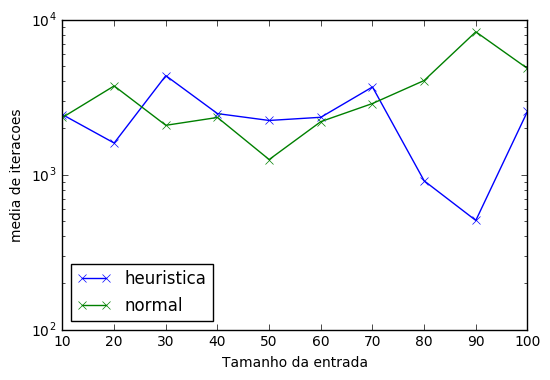

In [657]:
ax = df.plot(marker='x', logy=True,)
ax.set_ylabel('media de iteracoes')
ax.set_xlabel('Tamanho da entrada')